<a href="https://colab.research.google.com/github/dcolbourne/Colab/blob/TensorFlow/ComputerVisionandCNN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Class Image Classification

Just finished the binary classification and now we'll step it up with a 10 class multi-class model.

1. Become one with the data
2. Preprocess the data
3. Create a model
4. Fit the model
5. Evaluate the model
6. Adjust different hyperparamenters to improve the model
7. Repeat until satisfied

In [1]:
import os
import pandas as pd
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

1. Import and become one with the data

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip

zip_ref =  zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

--2024-12-12 01:27:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.207, 74.125.200.207, 74.125.130.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  22.3MB/s    in 23s     

2024-12-12 01:27:44 (21.1 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [3]:
# Walk through ten classes of food image data

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.

In [4]:
# Setup the train and test directories
train_dir = "/content/10_food_classes_all_data/train"
test_dir = "/content/10_food_classes_all_data/test"

In [5]:
# Let's get the class names
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [6]:
def view_random_image(target_dir, target_class):

  # Setup the target directory (we'll view images from here)
  target_folder = target_dir + "/" + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # Show the shape of the image

  return img

['3753321.jpg']
Image shape: (512, 512, 3)


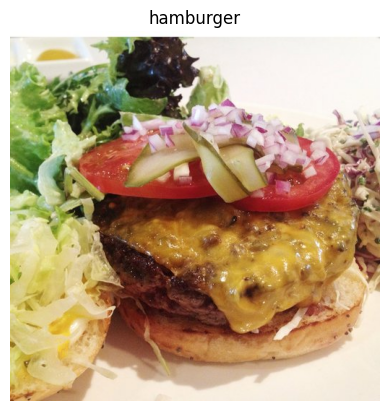

In [7]:
# Visualize, Visualize, Visualize
img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))



In [8]:
random.choice(class_names)

'ice_cream'

### 2. Preprocess the data

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create train and test data generators and rescale the data
# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [10]:
# Get a sample of a training data batch
images, labels = next(train_data)
len(images), len(labels)

(32, 32)

In [11]:
images[0].shape

(224, 224, 3)

In [12]:
labels

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 

In [25]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [26]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='categorical',
                                                                   shuffle=True) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               shuffle=True) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='categorical',
                                             shuffle=True)

Augmented training images:
Found 7500 images belonging to 10 classes.
Non-augmented training images:
Found 7500 images belonging to 10 classes.
Unchanged test images:
Found 2500 images belonging to 10 classes.


In [15]:
train_data_augmented[0]

(array([[[[0.07277675, 0.03751303, 0.04785199],
          [0.0638172 , 0.02879141, 0.03260371],
          [0.06551543, 0.0330781 , 0.02842931],
          ...,
          [0.07080227, 0.07472384, 0.08256698],
          [0.0708046 , 0.07472616, 0.0825693 ],
          [0.07095564, 0.07487721, 0.08272035]],
 
         [[0.06516292, 0.03105569, 0.03352543],
          [0.06160668, 0.03063917, 0.02367117],
          [0.06359364, 0.03299798, 0.02489588],
          ...,
          [0.07426024, 0.07818181, 0.08602495],
          [0.07425792, 0.07817949, 0.08602262],
          [0.07426509, 0.07818665, 0.08602979]],
 
         [[0.0500734 , 0.02714278, 0.02534637],
          [0.04099284, 0.02102568, 0.01033892],
          [0.03727812, 0.01767028, 0.00590557],
          ...,
          [0.08541922, 0.09297727, 0.08991098],
          [0.08370953, 0.09126525, 0.08820593],
          [0.07814164, 0.08569504, 0.08264268]],
 
         ...,
 
         [[0.62733907, 0.6668445 , 0.6620537 ],
          [0.62833

In [16]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
# Create the model (this is going to be our new baseline)

model_8 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(10, activation="softmax")

])

# Compile the model

model_8.compile(loss="categorical_crossentropy",
                optimizer=Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit the model

history_8 = model_8.fit(train_data_augmented,
                        epochs=5,
                        validation_data = test_data)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 124s 489ms/step - accuracy: 0.1390 - loss: 2.2794 - val_accuracy: 0.2504 - val_loss: 2.0700
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 127s 447ms/step - accuracy: 0.2772 - loss: 2.0457 - val_accuracy: 0.3212 - val_loss: 1.9441
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 143s 449ms/step - accuracy: 0.3049 - loss: 1.9577 - val_accuracy: 0.3356 - val_loss: 1.8860
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 105s 435ms/step - accuracy: 0.3494 - loss: 1.8844 - val_accuracy: 0.3644 - val_loss: 1.8616
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 101s 419ms/step - accuracy: 0.3796 - loss: 1.8213 - val_accuracy: 0.3628 - val_loss: 1.8392


### 5. Evaluate the model

In [17]:
# Evaluate on the test data

model_8.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.3801 - loss: 1.8251


[1.8391761779785156, 0.3628000020980835]

In [18]:
model_8.evaluate(train_data)

235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 88ms/step - accuracy: 0.3924 - loss: 1.7785


[1.7877615690231323, 0.39826667308807373]

In [22]:
# Check out the model's loss curves


In [23]:
# Plot the validation and training curves separately

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs =range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

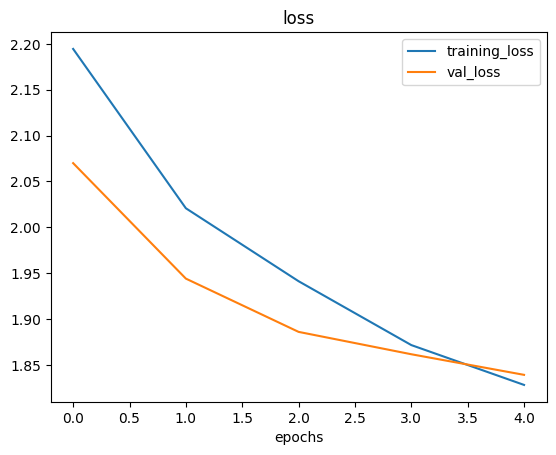

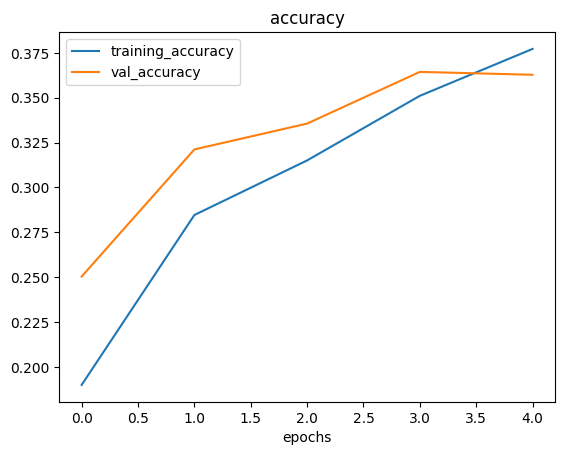

In [24]:
plot_loss_curves(history_8)

The loss curves tell us that the model is overfitting.

### 6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting

Try to fix by

* Get more data
* Simplify the model - reduce # of layers, reduce # of hidden layers
* Data augmentation
* Use transfer learning


In [27]:
# How about we try and simplify the model by removing 2 Conv2D layers

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
# Create the model (this is going to be our new baseline)

model_9 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(10, activation="softmax")

])

# Compile the model

model_9.compile(loss="categorical_crossentropy",
                optimizer=Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit the model

history_9 = model_9.fit(train_data_augmented,
                        epochs=10,
                        validation_data = test_data)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 111s 443ms/step - accuracy: 0.1162 - loss: 2.6366 - val_accuracy: 0.1428 - val_loss: 2.2873
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 102s 425ms/step - accuracy: 0.1491 - loss: 2.2650 - val_accuracy: 0.1892 - val_loss: 2.2096
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 102s 420ms/step - accuracy: 0.1764 - loss: 2.1997 - val_accuracy: 0.2592 - val_loss: 2.0530
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 142s 424ms/step - accuracy: 0.2420 - loss: 2.1065 - val_accuracy: 0.3104 - val_loss: 1.9720
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 105s 435ms/step - accuracy: 0.2718 - loss: 2.0621 - val_accuracy: 0.3364 - val_loss: 1.9002
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 101s 419ms/step - accuracy: 0.2870 - loss: 2.0115 - val_accuracy: 0.3316 - val_loss: 1.9431
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 105s 430ms/step - accuracy: 0.2961 - loss: 1.9963 - val_accuracy: 0.3696 - val_loss: 1.8117
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 102s 419ms/step - accuracy: 0.3262 -

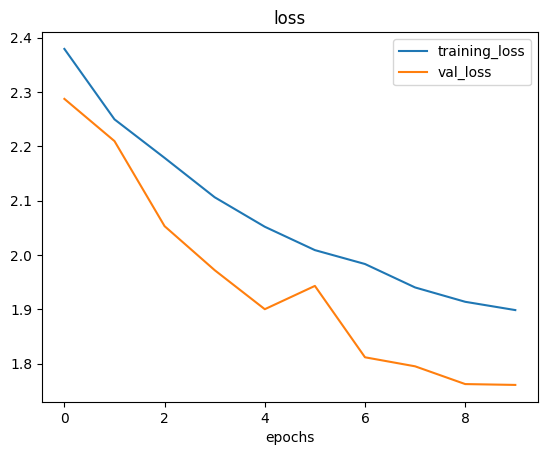

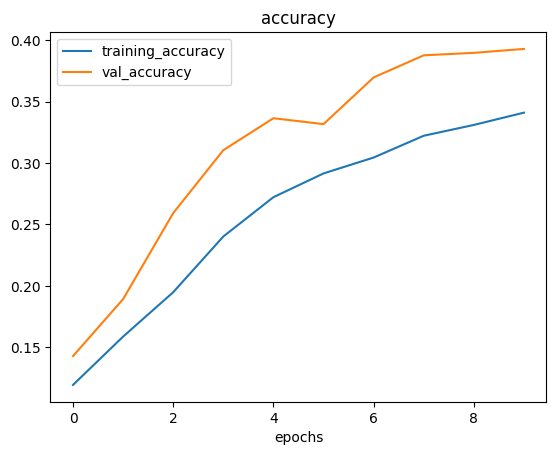

In [28]:
plot_loss_curves(history_9)

In [29]:
# Save a model

model_9.save("model_9.h5")

In [31]:
model_9.save("model_9_trained.keras")

In [34]:
# Loading a saved model
loaded_model_9 = tf.keras.models.load_model("model_9_trained.keras")

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [35]:
loaded_model_9.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 0.4076 - loss: 1.7447


[1.7608423233032227, 0.3928000032901764]

In [36]:
model_9.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.3970 - loss: 1.7604


[1.7608423233032227, 0.3928000032901764]

In [37]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [40]:
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [45]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [46]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


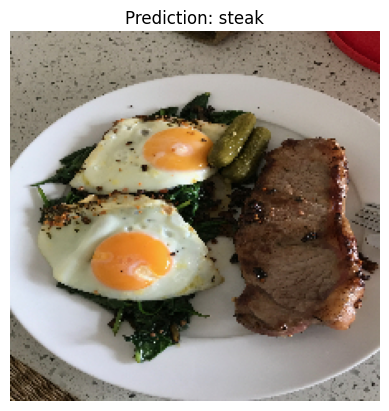

In [47]:
# Make a prediction using model_11
pred_and_plot(model=model_9,
              filename="03-steak.jpeg",
              class_names=class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


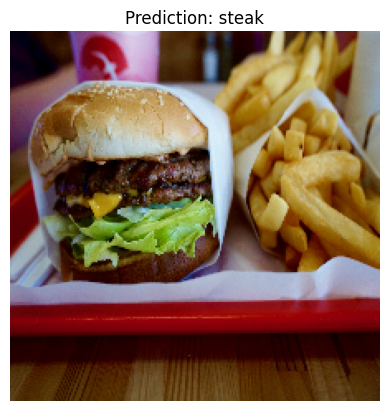

In [48]:
# Make a prediction using model_11
pred_and_plot(model=model_9,
              filename="03-hamburger.jpeg",
              class_names=class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


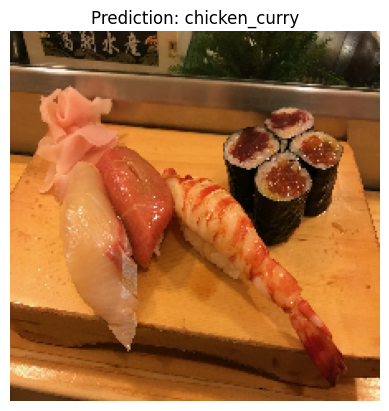

In [49]:
# Make a prediction using model_11
pred_and_plot(model=model_9,
              filename="03-sushi.jpeg",
              class_names=class_names)